



#  Machine Learning and Statistics Project





![title](Images/image1.jpg)

# Topic:
## Use a Model to Predict The Power Wind Speed Generates. 
## Create a Web Service That Makes Predictions

### Project Overview

In this project you must create a web service that uses machine learning to make predictions based on the data set powerproduction. The goal is to produce a model that accurately predicts wind turbine power output from wind speed values, as in the data set. You must then develop a web service that will respond with predicted power values based on speed values sent as HTTP requests. 

### Project Requirements

**Your submission must be in the form of a git repository containing, at a minimum, the following items:**

1. Jupyter notebook that trains a model using the data set. In the notebook you should explain your model and give an analysis    of its accuracy.
2. Python script that runs a web service based on the model, as above.
3. Dockerfile to build and run the web service in a container.
4. Standard items in a git repository such as a README.
5. Can add more than one model if you like. 

### Getting Started

**What is the Powerproduction Dataset?**

We will base our model on values which we are given in a dataset, wind turbine power output from wind speed values. Wind energy has emerged as a promising alternative source for overcoming the energy crisis in the world, and will help reduce the carbon footprint. Wind Power is a rapidly growning renewable energy source, this will only continue to grow due to concerns about climate warming. 

The uncertain nature of wind and high penetration of wind energy in power systems are a big challenge to the reliability and stability of these systems. To make wind energy a reliable source, accurate models for predicting the power output and performance monitoring of wind turbines are needed. We will create models below based on the values we already have, train the algorithm, and if a different wind speed is given, what will the that power output be. So basically, will forecast how much power you will use when the wind is a certain speed.


Source(Smart Energy)![title](Images/image3.jpg)



### Import Libraries

First we will **import libraries**, these are built in packages in Python which we will be using for our project. 

In [3]:
# Import packages 

import sklearn.neighbors as nei # sub package from scikitlearn.

# Need to import specific package with Scikitlearn.

import pandas as pd # Data structures and operations for manipulating numerical tables and time series.

import numpy as np # Fundamental package for array computing with Python.

import random # Returns random values.

import seaborn as sns # Data Visualization Library. 

import matplotlib.pyplot as plt# Creates a plotting area in a figure, plots some lines in a plotting area, adds labels.

# Magic function in IPython, function that renders the figure in a notebook.
%matplotlib inline

import scipy.stats as ss # Calculates the arithmetic mean of the array elements along the specified axis of the array.

from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split

### Pandas 

For data manipulation and analysis of our dataset.

In [8]:
# import dataset
ds = pd.read_csv("./powerproduction.csv")

In [9]:
# display contents
ds

,speed,power
0,0.000,0.0
1,0.125,0.0
2,0.150,0.0
3,0.225,0.0
4,0.275,0.0
...,...,...
495,24.775,0.0
496,24.850,0.0
497,24.875,0.0
498,24.950,0.0


In [4]:
# Locates data row two through eight.
ds.loc[2:8]

,speed,power
2,0.150,0.000
3,0.225,0.000
4,0.275,0.000
5,0.325,4.331
6,0.400,5.186
7,0.450,3.826
8,0.501,1.048


In [5]:
# Gives acess and outputs data on your index from row two. Index displayed on left side, numbers the rows.
# iloc is position of rows
# loc gets you index
ds.iloc[2]

speed    0.15
power    0.00
Name: 2, dtype: float64

In [6]:
# Finds individual cell
ds.at[5, 'speed']

0.325

### Summary Stats

In [7]:
ds.describe()

,speed,power
count,500.000000,500.000000
mean,12.590398,48.014584
std,7.224991,41.614572
min,0.000000,0.000000
25%,6.324750,5.288000
50%,12.550500,41.645500
75%,18.775250,93.537000
max,25.000000,113.556000


Average speed and power.

In [8]:
ds.mean()

speed    12.590398
power    48.014584
dtype: float64

In [9]:
# SELECT FROM ds WHERE speed >= 24 
ds[(ds['speed'] >= 24)]

,speed,power
481,24.024,105.992
482,24.049,93.524
483,24.174,95.869
484,24.199,101.419
485,24.249,103.700
486,24.299,93.694
487,24.349,93.078
488,24.374,98.223
489,24.399,95.117
490,24.499,0.000


Lets find out some information on our variables. 

In [10]:
# max speed
maxs = ds["speed"]
max_value = maxs.max()
print(max_value)

25.0


In [11]:
# min speed
min = ds["speed"]
min_value = min.min()
print(min_value)

0.0


In [12]:
# max power
maxs = ds["power"]
max_value = maxs.max()
print(max_value)

113.556


In [13]:
# min speed
min = ds["power"]
min_value = min.min()
print(min_value)

0.0


In [14]:
sp = ds[(ds['speed'] >= 0) & (ds['speed'] <= 3)]
print(ds)

      speed  power
0     0.000    0.0
1     0.125    0.0
2     0.150    0.0
3     0.225    0.0
4     0.275    0.0
..      ...    ...
495  24.775    0.0
496  24.850    0.0
497  24.875    0.0
498  24.950    0.0
499  25.000    0.0

[500 rows x 2 columns]


### Cleaning Data

We can see from avove that some of the values for wind speed at 2kph generate zero to six or seven ouputs, and others generate higher speed outputs of 14. This needs to be cleaned up.

https://medium.com/@rrfd/cleaning-and-prepping-data-with-python-for-data-science-best-practices-and-helpful-packages-af1edfbe2a3

**Before Cleaning**

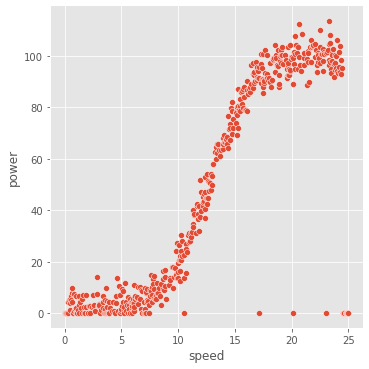

In [12]:
# Plot values for ds
sns.relplot(x="speed", y="power", data=ds); 

As we can see we have some values where 0 power outputs. 

In [10]:
ds[ds.power == 0].count()

speed    49
power    49
dtype: int64

In [23]:
# Select data from speed & power = to 0.
clean_d = ds[(ds["speed"]==0) & (ds["power"]==0)]

# Values from cars where greater than 0
above_zero = ds[(ds["speed"]>0) & (ds["power"]>0)]

# Append data 
clean_d = clean_d.append(above_zero)

clean_d

,speed,power
0,0.000,0.000
5,0.325,4.331
6,0.400,5.186
7,0.450,3.826
8,0.501,1.048
...,...,...
485,24.249,103.700
486,24.299,93.694
487,24.349,93.078
488,24.374,98.223


- We can see from above it removed the 49 values that = 0 and kept 1. 

**Before Cleaning**

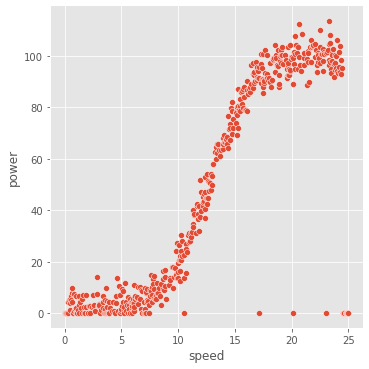

In [25]:
# Plot values for ds
sns.relplot(x="speed", y="power", data=ds); 

**After cleaning.**

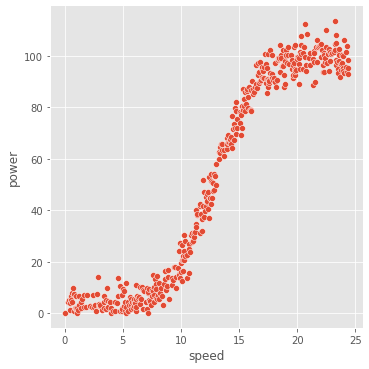

In [26]:
# Plot values for ds
sns.relplot(x="speed", y="power", data=clean_d);

### Visualize your data-set with Seaborn.

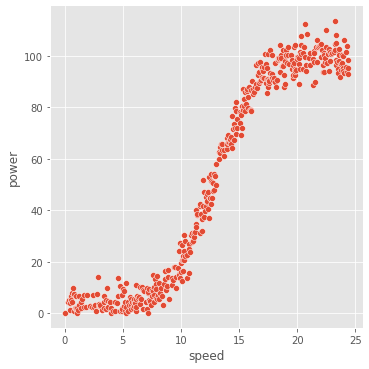

In [27]:
# Plot values for ds
sns.relplot(x="speed", y="power", data=clean_d); 

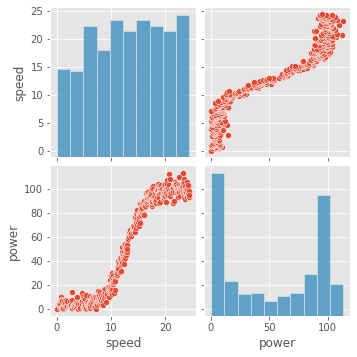

In [28]:
# Import Seaborn Package. Sometimes Jupyter can be a bit finicky with Seborn,
# May need to run it twice.
# plot the data with a pair plot
sns.pairplot(clean_d)

**Before Cleaning**

<AxesSubplot:xlabel='speed', ylabel='power'>

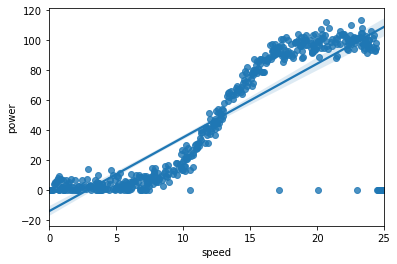

In [19]:

# Pick out two variables.
power = ds[["speed", "power"]].dropna()
# Scatter and fit line for just those two variables.
sns.regplot(x="speed", y="power", data=ds)

#### After cleaning

<AxesSubplot:xlabel='speed', ylabel='power'>

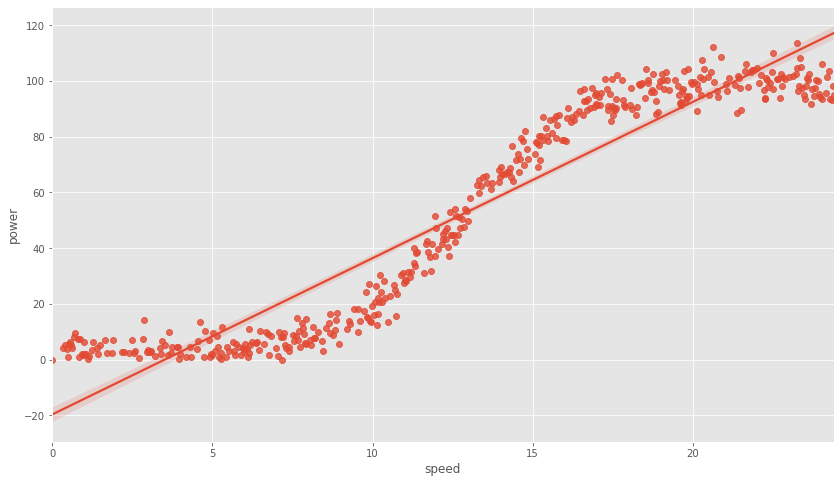

In [30]:
# Pick out two variables.
power = clean_d[["speed", "power"]].dropna()
# Scatter and fit line for just those two variables.
sns.regplot(x="speed", y="power", data=clean_d)

We can see that it is very similar to the multi-plot three cells above. The line gives you the best accuracy, and the shading at the top, gives you the impression that their is more uncertainty at the top than the bottom.

- Train
So now we try and come up with the parameters for the line, and make predictions of power gen from x input(wind speed).

## Model One

#### Train your model

Function and Models Create a function that can take an input x, and will have previously trained a list of values p, that help us make predictions, if the input is x, what is the output.

When you combine the input x, with the values in p, you have an algorithm that says yes or no.

In [42]:
# Takes two arguments, x is input for function,
# and p, which will be a list of values, that have been trained somehow on a dataset.

def f(x, p): 
    return p[0] + x * p[1] # 1st element in p (list), + x (input) * second value of p.

#### Analysis
- Train a simple model.
We willl use Power production dataset, consisting of 2 variables, wind and speed.

We have to come up with a function that predicts the power generated from wind speed.

In [43]:

# Manipulating two lists of numbers, one x and one y.
x = power["speed"].to_numpy()
y = power["power"].to_numpy()
x = x.reshape(-1, 1)


model = LinearRegression() # scikit learn gets the numbers for the line above on linear graph, and use linear regression.

model.fit(x, y) # gives body mass and flipper length values
r = model.score(x, y) # then ask whas the r value on the dataset
p = [model.intercept_, model.coef_[0]] # when x is zero where does y cut the axis, model.coef is the coefficient of x.

#### We ask what was the fit like?

**R-Value**

The relationship between two variables is generally considered strong when their r value is larger than 0.7. The correlation r measures the strength of the linear relationship between two quantitative variables.

#### Before cleaning the data, it displayed an r of 7.2. After we can see it is significatly higher, nealy .9. 

In [44]:
r

0.8983450728341917

**What was the coefficient?**

In [45]:
p

[-19.6362329967708, 5.606684691495633]

So we can see that -19.6 seems to be the absolute minimum power we would expect.

The second part of the data states that for km you go up in wind speed, it seems to add 5 extra ouptuts in power. So if you go up 1 kph in wind speed, you will get around 5.6 outputs of power generated.

**Predict**

Now we call f, our fuction, and ask if we had a wind speed at 11 kph, what would it's power generated be?

In [46]:
# Based on the p from training the model.
f(11.0, p)

42.03729860968116

Go up 1 kph in wind speed from 11 to 12, should generate power of an increse of 5.6 to 47.

In [47]:
f(12.0, p)

47.64398330117679

We can see here that our training model was not far off.

In [59]:
o = ds[(ds['speed'] >= 12) & (ds['speed'] <= 13)]
o

,speed,power
237,12.037,39.584
238,12.162,41.599
239,12.187,45.056
240,12.212,43.198
241,12.262,46.136
242,12.287,43.454
243,12.337,47.282
244,12.362,40.519
245,12.387,37.159
246,12.412,52.952


Can see our aveage for wind at 11kph is indeed a power output of 47. 

In [60]:
o.mean()

speed    12.520833
power    46.581458
dtype: float64

### Summary
You have to think about functions, not a lot to get in terms of calculations in Machine Learning & Statistics. It's the ideas in terms of what the calculations mean in the real world that are important. The functions takes two inputs, one that you give it and the other was the data from the dataset we trained it on. P might only change if we got a lot wind values and added them in, and the linear line might change then.

### Train Your Model using KNN

Here we will use KNN (K-Nearest Neighbours) to train our model. 

K Nearest Neighbor(KNN) is a very simple, easy to understand, versatile and one of the topmost machine learning algorithms. KNN used in the variety of applications such as finance, healthcare, political science, handwriting detection, image recognition and video recognition. In Credit ratings, financial institutes will predict the credit rating of customers. In loan disbursement, banking institutes will predict whether the loan is safe or risky. In political science, classifying potential voters in two classes will vote or won’t vote. KNN algorithm used for both classification and regression problems. KNN algorithm based on feature similarity approach. You can read up and find out <a href="https://www.datacamp.com/community/tutorials/k-nearest-neighbor-classification-scikit-learn">here</a> a more detailed expalanation of how the algorithm works, and what code is to be applied when using this algorithm. (Datacamp, 2018)

KNN works by finding the distances between a query and all the examples in the data, selecting the specified number examples (K) closest to the query, then votes for the most frequent label (in the case of classification) or averages the labels (in the case of regression). It is a process of sorting a given set of data into each different class. 

**Classification** can be implemented on both kinds of data structured as well as unstructured. Classes are often referred to as labels or targets which hold different classes. For example, classifying different fruits. 

**Regression** analysis is done for one of two purposes: In order to predict the value of the dependent variable for individuals for whom some information concerning the explanatory variables is available, or in order to estimate the effect of some explanatory variable on the dependent variable. (Analytic Steps, 2020)

### K-Nearest Neighbours



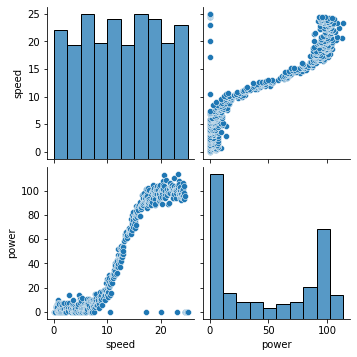

In [27]:
# Plot data
sns.pairplot(ds)

Visualize our dataset on a plot.

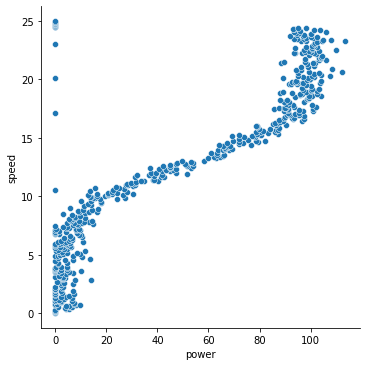

In [28]:
# Plot values for ds
sns.relplot(x="power", y="speed", data=ds);

### Predict
- Take the two varibles in the columns (speed and power) and take those two values and predict the power that will be generated from a wind speed, that a given set of values relate to.
- Going to use the algorithm to build up a model, to predict the power from a certain speed.
- If you come across a new wind speed, can go to your KNN algorithm and test the new values, and hopefully KNN algorithm will be able to predict what power will be generated, based on the set of values from the data-set it has seen before.

### Loading inputs and outputs.
-The idea here is to train the algorithm to know the power, so that if you come along with a new wind speed it will be able to tell you what kind of power will be ouptut, based on it's previous values in the dataset.

In [32]:
# Select column names from the dataframe.
inputs = ds[['speed']] # Create new variable called inputs, from df speed
# Species column
outputs = ds[['power']] # Create variable called outputs from df col, power.

**Call inputs**

In [33]:
# Values from speed column.
inputs # shows all the inputs you asked from the function above.

,speed
0,0.000
1,0.125
2,0.150
3,0.225
4,0.275
...,...
495,24.775
496,24.850
497,24.875
498,24.950


**Call Outputs**

In [34]:
# Values from speed column.
outputs # shows all the inputs you asked from the function above.

,power
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
495,0.0
496,0.0
497,0.0
498,0.0


### Classifier
Create the classifier and fits it to our data-set, and predict.

How to <a href="https://www.datacamp.com/community/tutorials/k-nearest-neighbor-classification-scikit-learn">train</a> K Nearest Neighbours classifier in sklearn.

In KNN, K is the number of nearest neighbors. The number of neighbors is the core deciding factor. K is generally an odd number if the number of classes is 2. When K=1, then the algorithm is known as the nearest neighbor algorithm. (Datacamp, 2020)

### Fit
- Train the classifier on your dataset.
- Give it the inputs for which you know the outputs, you're going to fit that.
- Tells KNN the data, and asks it to build a model.
- Based on what each flower looks like, and in the future, be able to predict.

*******

## Model Two

## Using A Neural Network to train your model. 

### Neural Networks

**Neural networks** are a means of doing machine learning, in which a computer learns to perform some task by analyzing training examples. Usually, the examples have been hand-labeled in advance. An object recognition system, for instance, might be fed thousands of labeled images of cars, houses, coffee cups, and so on, and it would find visual patterns in the images that consistently correlate with particular labels.

Modeled loosely on the human brain, a neural net consists of thousands or even millions of simple processing nodes that are densely interconnected. Most of today’s neural nets are organized into layers of nodes, and they’re “feed-forward,” meaning that data moves through them in only one direction. An individual node might be connected to several nodes in the layer beneath it, from which it receives data, and several nodes in the layer above it, to which it sends data.



Bunch of inputs coming in, once the inputs get big enough, they fire outputs to other neural networks.

Start out with dataset, containing variables.
Subset will be input variables
Subset will be output variables

For example, the first four variales in iris Dataset, sepal mength and width, petal lenght and width, are input variables, and the fifth variable species is your class, or output variable.

When you have your model trained, and it's stable, put new values through your neural network, and it will predict what the value is based on it's training. (M.I.T, 2017)



![title](Images/image5.png)

#### Neural network vs deep neural network, no difference, just more layers in deep network.

#### Weights and biases in Neural Networks
Weights and biases (commonly referred to as w and b) are the learnable parameters of a machine learning model.
Neurons are the basic units of a neural network. In an ANN, each neuron in a layer and is connected to each neuron in the next layer. When the inputs are transmitted between neurons, the weights are applied to the inputs along with the bias.

#### Weights
Weights control the signal (or the strength of the connection) between two neurons. In other words, a weight decides how much influence the input will have on the output. Biases, which are constant, are an additional input into the next layer that will always have the value of 1. Bias units are not influenced by the previous layer (they do not have any incoming connections) but they do have outgoing connections with their own weights. The bias unit guarantees that even when all the inputs are zeros there will still be an activation in the neuron. (Paperspace, 2019)


Machine learning is all about inputs and outputs, and getting a good result.

### Here we will be using Keras. 

Keras is a powerful and easy-to-use free open source Python library for developing and evaluating deep learning models. It wraps the efficient numerical computation libraries Theano and TensorFlow and allows you to define and train neural network models in just a few lines of code. For a more detailed look at how it works and get started please look <a href="https://keras.io/getting_started/intro_to_keras_for_engineers/">here.</a>

![title](Images/image6.png)

**How to install Keras and Tensorflow**
- Update your Anaconda enviroment 
- Type in the following commands on your command line. 

1. conda update conda
2. conda update --all
3. pip install tensorflow





#### Neural Networks

Code dapted from: 

https://www.freecodecamp.org/news/how-to-build-your-first-neural-network-to-predict-house-prices-with-keras-f8db83049159/

https://github.com/ianmcloughlin/jupyter-teaching-notebooks

In [1]:
# Neural networks.
import tensorflow.keras as kr

In [4]:
# Plot style.
plt.style.use("ggplot")

# Plot size.
plt.rcParams['figure.figsize'] = [14, 8]

### Here we use our dataset

In [77]:
# Import Dataset
df = pd.read_csv("./powerproduction.csv")
df

,speed,power
0,0.000,0.0
1,0.125,0.0
2,0.150,0.0
3,0.225,0.0
4,0.275,0.0
...,...,...
495,24.775,0.0
496,24.850,0.0
497,24.875,0.0
498,24.950,0.0


Now that we’ve seen what our data looks like, we want to convert it into arrays for our machine to process:

In [104]:
dataset = clean_d.values

In [105]:
dataset

array([[0.00000e+00, 0.00000e+00],
       [1.25000e-01, 0.00000e+00],
       [1.50000e-01, 0.00000e+00],
       [2.25000e-01, 0.00000e+00],
       [2.75000e-01, 0.00000e+00],
       [3.25000e-01, 4.33100e+00],
       [4.00000e-01, 5.18600e+00],
       [4.50000e-01, 3.82600e+00],
       [5.01000e-01, 1.04800e+00],
       [5.26000e-01, 5.55300e+00],
       [5.51000e-01, 6.49800e+00],
       [5.76000e-01, 5.24100e+00],
       [6.26000e-01, 4.22000e+00],
       [6.76000e-01, 7.97400e+00],
       [7.01000e-01, 9.74600e+00],
       [7.26000e-01, 0.00000e+00],
       [7.51000e-01, 0.00000e+00],
       [8.01000e-01, 7.27100e+00],
       [8.26000e-01, 7.95000e-01],
       [8.51000e-01, 7.35000e+00],
       [9.26000e-01, 1.99600e+00],
       [9.51000e-01, 1.60900e+00],
       [9.76000e-01, 2.06400e+00],
       [1.00100e+00, 6.51100e+00],
       [1.02600e+00, 0.00000e+00],
       [1.05100e+00, 2.08500e+00],
       [1.07600e+00, 0.00000e+00],
       [1.10100e+00, 1.21000e-01],
       [1.15100e+00,

Now we split our dataset into input features (X) and the feature we wish to predict (Y). We simply assign the first column of our array to a variable called X and the last column of our array to a variable called Y. 

In [106]:
# Before the comma, mean take all the rows in the array, after comma mean take 1st col
X = dataset[:,0:1]

Now assign Y

In [107]:
# 1 is the econd column
Y = dataset[:,1]

We’ve split our dataset into input features (X) and the label of what we want to predict (Y).

In [108]:
# next step in our processing is to make sure that the scale of the input features are similar.
from sklearn import preprocessing

This aids the training of our neural network

In [109]:
# we use a function called the min-max scaler, 
# which scales the dataset so that all the input features lie between 0 and 1 inclusive.
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

Scaled dataset is stored in X_scale

In [110]:
X_scale

array([[0.     ],
       [0.005  ],
       [0.006  ],
       [0.009  ],
       [0.011  ],
       [0.013  ],
       [0.016  ],
       [0.018  ],
       [0.02004],
       [0.02104],
       [0.02204],
       [0.02304],
       [0.02504],
       [0.02704],
       [0.02804],
       [0.02904],
       [0.03004],
       [0.03204],
       [0.03304],
       [0.03404],
       [0.03704],
       [0.03804],
       [0.03904],
       [0.04004],
       [0.04104],
       [0.04204],
       [0.04304],
       [0.04404],
       [0.04604],
       [0.05004],
       [0.05104],
       [0.05204],
       [0.05604],
       [0.05704],
       [0.06008],
       [0.06208],
       [0.06608],
       [0.06708],
       [0.06808],
       [0.07308],
       [0.07508],
       [0.07608],
       [0.08108],
       [0.08308],
       [0.08408],
       [0.08708],
       [0.08908],
       [0.09008],
       [0.09608],
       [0.09908],
       [0.10212],
       [0.10312],
       [0.10812],
       [0.11312],
       [0.11412],
       [0.

Now, we are down to our last step in processing the data, which is to split our dataset into a training set, a validation set and a test set.

In [111]:
# code from scikit-learn that splits our dataset into a training set and a test set

from sklearn.model_selection import train_test_split


In [112]:
# This tells scikit-learn that your val_and_test size will be 30% of the overall dataset.

X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)

In [113]:
# separate validation set and test set, we can use the same function to do the split again on val_and_test.
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

Here we can see our values for training, testing and validation for both variables, speed and power.. 

350 values for training, 75 for validation and 75 for testing.

In [114]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(350, 1) (75, 1) (75, 1) (350,) (75,) (75,)


### Now we build and train our neural network.

In [115]:
# Create a neural network with one neuron.

# keras models sub package, for building up Sequential layers.
model = kr.models.Sequential()

# Add layers
# Add a single neuron in a single layer, initialised with weight 1 and bias 0.
# Dense, add everything in previous layer to current layer.
# 1 parameter, input_dim(tells seq model one input), 
# Kernal _iniat activates the weights to 1's, bias iniat to 0.
model.add(kr.layers.Dense(1, input_shape=(1,), activation="linear", kernel_initializer='ones', bias_initializer='zeros'))

# Compile the model. Create neuron network. 
# optimzer changes weights in biases to move in direction of the expected outputs
# loss = figues out cal that neural net does, is it getting closer to expected outputs, or further away. 
# Optimizer looks at loss, based on trainiing set we give it, and shakes n.network a little to give expected outputs.
model.compile(optimizer='adam', loss='mean_squared_error') # optimizer = adam
# weights and bias get nudged by the optimizer, amount the get nudged by is related to learning rate, term for number.

### Fit Training Dataset to Neural Network

- Train the neural network on our training data.
- Takes a list of x values, and a list of corresponding y values. 
- 1st x value corresponds with 1st y value and so on. 
- Goes into neural network and passes x values through neural network,
- To see what n net is telling us, would be the y value that it is predicting.
- Compare that using means squared error to what we wnat the y val to be for corresponding x value. 
- What we're looking for neural net to do, is look at all the x and y values, that we have generated, 
- and tell us how they were generated. 
- It knows that we gave it x and y values, and a linear relationship between them, 
- because we chose a linear activation in the model above. 

In [116]:
model.fit(X_train, Y_train, epochs=500)

# Epoch is the num of times each x value goes through neural network
# each time it goes through, neural n tries to improve it's predictions. 
# 100 values = 500k times through neural network.
# loss function below 1st value has a loss value of 13606, -y, square that, sum of all of those diff squares,
# maybe divide by 1000. That is the means sqaured error, we just mentioned above.
# Weight and the bias, neural net keeps nudging it in right direction every time it runs it through,
# Can see below that the value keeps decreasing.
# Our total loss at the end is quite significant.

Epoch 1/500
11/11 [==============================] - 1s 1ms/step - loss: 4185.9109
Epoch 2/500
11/11 [==============================] - 0s 1ms/step - loss: 4392.6324
Epoch 3/500
11/11 [==============================] - 0s 2ms/step - loss: 4411.2279
Epoch 4/500
11/11 [==============================] - 0s 1ms/step - loss: 3834.7142
Epoch 5/500
11/11 [==============================] - 0s 2ms/step - loss: 4146.5743
Epoch 6/500
11/11 [==============================] - 0s 1ms/step - loss: 4065.0945
Epoch 7/500
11/11 [==============================] - 0s 3ms/step - loss: 4162.5498
Epoch 8/500
11/11 [==============================] - 0s 1ms/step - loss: 4312.3526
Epoch 9/500
11/11 [==============================] - 0s 2ms/step - loss: 4391.8049
Epoch 10/500
11/11 [==============================] - 0s 2ms/step - loss: 4307.8499
Epoch 11/500
11/11 [==============================] - 0s 1ms/step - loss: 3948.5633
Epoch 12/500
11/11 [==============================] - 0s 2ms/step - loss: 4477.9310
E

Epoch 98/500
11/11 [==============================] - 0s 2ms/step - loss: 4034.3132
Epoch 99/500
11/11 [==============================] - 0s 2ms/step - loss: 3980.6485
Epoch 100/500
11/11 [==============================] - 0s 1ms/step - loss: 3707.5281
Epoch 101/500
11/11 [==============================] - 0s 2ms/step - loss: 3802.2837
Epoch 102/500
11/11 [==============================] - 0s 2ms/step - loss: 4259.5339
Epoch 103/500
11/11 [==============================] - 0s 1ms/step - loss: 3975.7377
Epoch 104/500
11/11 [==============================] - 0s 2ms/step - loss: 4125.1484
Epoch 105/500
11/11 [==============================] - 0s 2ms/step - loss: 3997.3929
Epoch 106/500
11/11 [==============================] - 0s 2ms/step - loss: 3944.4534
Epoch 107/500
11/11 [==============================] - 0s 2ms/step - loss: 4152.1723
Epoch 108/500
11/11 [==============================] - 0s 2ms/step - loss: 3723.8174
Epoch 109/500
11/11 [==============================] - 0s 2ms/step 

11/11 [==============================] - 0s 2ms/step - loss: 4082.2922
Epoch 195/500
11/11 [==============================] - 0s 2ms/step - loss: 3622.6861
Epoch 196/500
11/11 [==============================] - 0s 2ms/step - loss: 3654.0075
Epoch 197/500
11/11 [==============================] - 0s 1ms/step - loss: 3618.2016
Epoch 198/500
11/11 [==============================] - 0s 2ms/step - loss: 3913.1552
Epoch 199/500
11/11 [==============================] - ETA: 0s - loss: 5045.02 - 0s 2ms/step - loss: 4066.8589
Epoch 200/500
11/11 [==============================] - 0s 2ms/step - loss: 4095.9353
Epoch 201/500
11/11 [==============================] - 0s 1ms/step - loss: 3687.8405
Epoch 202/500
11/11 [==============================] - 0s 2ms/step - loss: 4001.8449
Epoch 203/500
11/11 [==============================] - 0s 2ms/step - loss: 3725.0647
Epoch 204/500
11/11 [==============================] - 0s 2ms/step - loss: 3831.1693
Epoch 205/500
11/11 [==============================] 

11/11 [==============================] - 0s 2ms/step - loss: 3555.6769
Epoch 290/500
11/11 [==============================] - 0s 2ms/step - loss: 3638.8107
Epoch 291/500
11/11 [==============================] - 0s 1ms/step - loss: 3603.1422
Epoch 292/500
11/11 [==============================] - 0s 1ms/step - loss: 3654.1910
Epoch 293/500
11/11 [==============================] - 0s 2ms/step - loss: 3816.8221
Epoch 294/500
11/11 [==============================] - 0s 2ms/step - loss: 3770.1730
Epoch 295/500
11/11 [==============================] - 0s 2ms/step - loss: 3871.9415
Epoch 296/500
11/11 [==============================] - 0s 2ms/step - loss: 3620.7632
Epoch 297/500
11/11 [==============================] - 0s 2ms/step - loss: 3631.2846
Epoch 298/500
11/11 [==============================] - 0s 2ms/step - loss: 3611.6413
Epoch 299/500
11/11 [==============================] - 0s 2ms/step - loss: 3666.9872
Epoch 300/500
11/11 [==============================] - 0s 2ms/step - loss: 4016

11/11 [==============================] - 0s 1ms/step - loss: 3326.0091
Epoch 386/500
11/11 [==============================] - 0s 1ms/step - loss: 3462.8867
Epoch 387/500
11/11 [==============================] - 0s 2ms/step - loss: 3633.8353
Epoch 388/500
11/11 [==============================] - 0s 2ms/step - loss: 3340.6369
Epoch 389/500
11/11 [==============================] - 0s 2ms/step - loss: 3593.5569
Epoch 390/500
11/11 [==============================] - 0s 2ms/step - loss: 3572.5168
Epoch 391/500
11/11 [==============================] - 0s 1ms/step - loss: 3546.6221
Epoch 392/500
11/11 [==============================] - 0s 2ms/step - loss: 3736.4980
Epoch 393/500
11/11 [==============================] - 0s 2ms/step - loss: 3639.8970
Epoch 394/500
11/11 [==============================] - 0s 2ms/step - loss: 3549.3353
Epoch 395/500
11/11 [==============================] - 0s 2ms/step - loss: 3297.6951
Epoch 396/500
11/11 [==============================] - 0s 2ms/step - loss: 3403

11/11 [==============================] - 0s 1ms/step - loss: 3464.6587
Epoch 482/500
11/11 [==============================] - 0s 2ms/step - loss: 3260.2840
Epoch 483/500
11/11 [==============================] - 0s 2ms/step - loss: 3354.2138
Epoch 484/500
11/11 [==============================] - 0s 1ms/step - loss: 3399.5742
Epoch 485/500
11/11 [==============================] - 0s 1ms/step - loss: 3437.3578
Epoch 486/500
11/11 [==============================] - 0s 2ms/step - loss: 3436.3598
Epoch 487/500
11/11 [==============================] - 0s 2ms/step - loss: 3441.4803
Epoch 488/500
11/11 [==============================] - 0s 2ms/step - loss: 3352.3481
Epoch 489/500
11/11 [==============================] - 0s 2ms/step - loss: 3244.0331
Epoch 490/500
11/11 [==============================] - 0s 2ms/step - loss: 3484.0769
Epoch 491/500
11/11 [==============================] - 0s 2ms/step - loss: 3071.1108
Epoch 492/500
11/11 [==============================] - 0s 2ms/step - loss: 3259

Here we can see the inputs and what the ouputs will be below. 
-So if speed is one, output of power will be 11, and so on.

In [117]:
model.predict([1.0,2.0,3.0])

array([[11.648672],
       [17.977167],
       [24.30566 ]], dtype=float32)

In [118]:
o = clean_d[(clean_d['speed'] >= 2) & (clean_d['speed'] <= 3)]
o

,speed,power
42,2.027,0.000
43,2.077,0.000
44,2.102,0.000
45,2.177,2.701
46,2.227,2.869
47,2.252,0.000
48,2.402,2.287
49,2.477,6.947
50,2.553,2.370
51,2.578,3.165


In [119]:
o.mean()

speed    2.443500
power    3.256429
dtype: float64

# Need to clean the data and go back and tweak this model. 

### Summary so far.
- Taken a 1000 values of x, y pairs, and started out with a neural network that knows nothing about dataset.
- We trained the neuron. We gave it X, Y value pairs.
- It looked at those, and in turn has built in mechanisms, to try and mimic how you would get from x values to the y values.

### We have only trained the neural network on train set so far, not the test set.
Ask the model to predict bases on the test x values, make predictions on what you think the y values should be.
Was trained on train set, not test set.
Actual and predictions. Ask model to predict based on x values, and what y values should be.
Can't see red, cause blue perfectly on top of them.
So neural network doing a good job.
Can reduce the number of EPOCHS when you are fitting, training the model.
We used 500 above, if you reduce it to 10, you will see in the linear grapgh below that the neural network will be quite off.

### Summary

### References

Datacamp, KNN, 2018, viewed on the 2019/12/17, available online at:https://www.datacamp.com/community/tutorials/k-nearest-neighbor-classification-scikit-learn

Analytic Steps, 2020, viewed on the 2019/12/17, available online at: https://www.analyticssteps.com/blogs/how-does-k-nearest-neighbor-works-machine-learning-classification-problem

Medium, Cleaning and Prepping Data with Python, 2018, viewed on the 2019/12/19, available online at:  https://medium.com/@rrfd/cleaning-and-prepping-data-with-python-for-data-science-best-practices-and-helpful-packages-af1edfbe2a3

M.I.T News, Neural Networks, 2017, viewed on the 2019/12/19, available online at: https://news.mit.edu/2017/explained-neural-networks-deep-learning-0414

Keras, Introduction to Keras, 2020, viewed on the 2019/12/19, available online at: https://keras.io/getting_started/intro_to_keras_for_engineers/

Paperspace, Weights and Bias, 2019, viewed on the 2019/12/19, available online at: https://docs.paperspace.com/machine-learning/wiki/weights-and-biases




### The End